In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.facecolor':'white'})

## 分析の概要と目的
data3はあるお弁当会社の販売数のデータである.本分析では,曜日`week`(ダミー化),温度`temperature`の2つを独立変数,お弁当の販売数`y`を従属変数として,重回帰分析によって独立変数から従属変数を予測できないか検討する.

In [9]:
df = pd.read_csv("data3.csv")
df["datetime"] = pd.to_datetime(df["datetime"], format='%Y-%m-%d')
df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       207 non-null    datetime64[ns]
 1   y              207 non-null    int64         
 2   week           207 non-null    object        
 3   soldout        207 non-null    int64         
 4   name           207 non-null    object        
 5   kcal           166 non-null    float64       
 6   remarks        21 non-null     object        
 7   event          14 non-null     object        
 8   payday         10 non-null     float64       
 9   weather        207 non-null    object        
 10  precipitation  207 non-null    object        
 11  temperature    207 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 19.5+ KB


In [11]:
# preprocess
# datatime,y,week,tempratureのみを抽出する.
df = df[["datetime","y","week","temperature"]]
df

,datetime,y,week,temperature
0,2013-11-18,90,月,19.8
1,2013-11-19,101,火,17.0
2,2013-11-20,118,水,15.5
3,2013-11-21,120,木,15.2
4,2013-11-22,130,金,16.1
...,...,...,...,...
202,2014-09-24,59,水,24.8
203,2014-09-25,50,木,25.4
204,2014-09-26,45,金,27.1
205,2014-09-29,56,月,26.6


## statsmodelsを用いた重回帰分析

In [44]:
import statsmodels.api as sm 

X = pd.get_dummies(df[["temperature","week"]]) # 曜日をダミー変数化
y = df["y"]

model = sm.OLS(y,sm.add_constant(X)) # sm.add_constant() : 切片を追加して形を整える
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     34.30
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           2.91e-25
Time:                        14:43:51   Log-Likelihood:                -952.41
No. Observations:                 207   AIC:                             1917.
Df Residuals:                     201   BIC:                             1937.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         113.0760      3.486     32.437      0.000     106.202     119.950
temperature    -2.5388      0.198    -12.800      0.000      -2.930      -2.148
week_月         30.8786      3.569      8.651      0.000      23.841      37.917
week_木         13.1428      3.394      3.872      0.000       6.450      19.836
week_水         20.5865      3.396      6.063      0.000      13.891      27.282
week_火         24.4677      3.513      6.965      0.000      17.541      31.395
week_金         24.0004      3.496      6.866      0.000      17.107      30.893
==============================================================================
Omnibus:                       23.275   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.801
Skew:                           0.809   Prob(JB):                     9.18e-07
Kurtosis:                       3.779   Cond. No.                     1.71e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

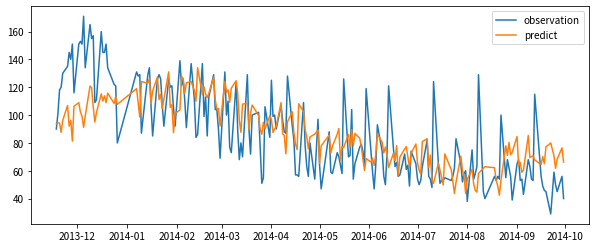

In [45]:
# 観測値yと予測値の比較
pred = results.predict(sm.add_constant(X))
plt.figure(facecolor="white",figsize=(10,4))
plt.plot(df["datetime"],df["y"],label="observation")
plt.plot(df["datetime"],pred,label="predict")
plt.legend()
plt.show()

線形モデルでは,誤差部分が正規分布に従うと仮定しているため,作成したモデルがきちんとデータを説明しているかを理解するために,残差の正規性を調べることが重要である.

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


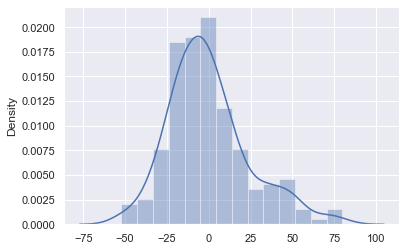

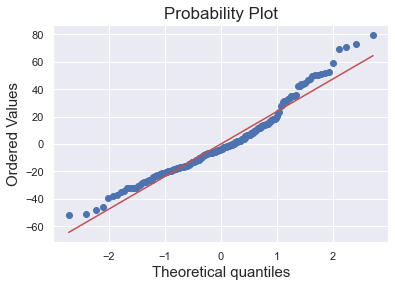

In [63]:
from scipy import stats

# 残差のプロット
resid = results.resid # 残差を取得
# カーネル密度
plt.figure()
sns.distplot(resid)
plt.show()

# 正規QQプロット
plt.figure(facecolor='white')
stats.probplot(resid,dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

## 結果の解釈
- t検定の結果,F値が34.30,P値が2.91e-25で有意である.
- 自由度調整済み決定係数は0.447であるから,このモデルはデータを44.7%説明できる.
- すべての説明変数のP値が0.05以下であるから統計的に意味があると言える.
- 残差のプロットから,残差が正規分布に従うと結論付ける.